In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
working_folder='/content/drive/MyDrive/TransformersCode/05-Service_Center/'

photos_folder=working_folder + 'photos/'

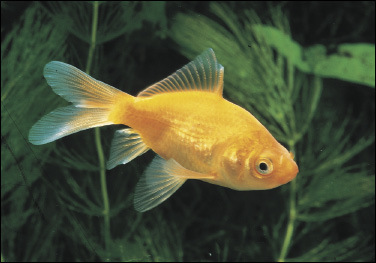

In [3]:
from PIL import Image

image_path = photos_folder + 'fish.JPEG'

image = Image.open(image_path)
image

In [4]:
model_id='google/vit-base-patch16-224'

In [5]:
from transformers import ViTImageProcessor, ViTForImageClassification

model = ViTForImageClassification.from_pretrained(model_id)

processor = ViTImageProcessor.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [6]:
inputs = processor(images=image, return_tensors="pt")

inputs

{'pixel_values': tensor([[[[-0.9608, -0.9373, -0.9451,  ..., -0.9529, -0.9529, -0.9608],
          [-0.8431, -0.6863, -0.7333,  ..., -0.7961, -0.7882, -0.9059],
          [-0.8431, -0.6941, -0.7569,  ..., -0.8039, -0.7647, -0.8980],
          ...,
          [-0.6549, -0.3490, -0.5529,  ..., -0.8039, -0.8039, -0.9137],
          [-0.6863, -0.3882, -0.5451,  ..., -0.8431, -0.8275, -0.9216],
          [-0.8824, -0.8588, -0.8824,  ..., -0.9608, -0.9686, -0.9765]],

         [[-0.9529, -0.9137, -0.9294,  ..., -0.9373, -0.9451, -0.9765],
          [-0.8353, -0.6392, -0.6941,  ..., -0.7804, -0.7725, -0.8980],
          [-0.8196, -0.6314, -0.6941,  ..., -0.7725, -0.7490, -0.8902],
          ...,
          [-0.5608, -0.1216, -0.4039,  ..., -0.7647, -0.7804, -0.9137],
          [-0.5686, -0.1294, -0.3647,  ..., -0.8118, -0.8118, -0.9216],
          [-0.8980, -0.8039, -0.8745,  ..., -0.9373, -0.9608, -0.9765]],

         [[-0.9451, -0.9373, -0.9451,  ..., -0.9451, -0.9451, -0.9529],
          [-0

In [7]:
print(inputs['pixel_values'].size())

torch.Size([1, 3, 224, 224])


In [8]:
outputs = model(**inputs)
outputs

ImageClassifierOutput(loss=None, logits=tensor([[ 8.4699e+00,  1.4734e+01, -5.3513e-01,  1.1194e+00,  8.2655e-01,
          2.1563e+00, -3.8241e-01, -3.0277e-01, -4.6974e-01,  3.3533e-01,
          5.1129e-01, -1.8913e-01,  1.6991e-01, -6.6045e-01,  4.6527e-01,
         -1.1353e+00, -9.0383e-01, -1.5033e-01, -1.2773e+00, -1.0365e-01,
         -2.3978e-01,  1.3417e+00, -4.8466e-02,  8.9026e-01,  8.4133e-01,
         -4.1548e-01,  1.7498e+00,  3.6784e-01, -7.7250e-02,  3.3385e+00,
         -3.5336e-01, -7.0514e-01,  1.8906e-01,  1.1669e+00,  3.5047e-01,
          1.1244e+00,  1.9929e+00,  4.5150e-01,  3.8518e-01, -1.3696e+00,
         -9.4949e-01,  2.3025e-01, -1.8602e-02,  8.0694e-01, -9.1103e-01,
         -3.2717e-01, -8.7971e-01,  1.7272e-01, -2.9593e-01, -4.1550e-01,
          1.5477e-01,  2.8150e-01,  2.7314e-01, -4.4782e-01, -2.5523e-01,
         -1.4230e+00, -1.0091e+00, -1.0332e+00,  4.6977e-02, -1.3076e+00,
         -1.6157e-01, -7.2809e-01, -2.9921e-01, -3.5258e-01, -1.0462e-01

In [9]:
logits = outputs.logits
logits

tensor([[ 8.4699e+00,  1.4734e+01, -5.3513e-01,  1.1194e+00,  8.2655e-01,
          2.1563e+00, -3.8241e-01, -3.0277e-01, -4.6974e-01,  3.3533e-01,
          5.1129e-01, -1.8913e-01,  1.6991e-01, -6.6045e-01,  4.6527e-01,
         -1.1353e+00, -9.0383e-01, -1.5033e-01, -1.2773e+00, -1.0365e-01,
         -2.3978e-01,  1.3417e+00, -4.8466e-02,  8.9026e-01,  8.4133e-01,
         -4.1548e-01,  1.7498e+00,  3.6784e-01, -7.7250e-02,  3.3385e+00,
         -3.5336e-01, -7.0514e-01,  1.8906e-01,  1.1669e+00,  3.5047e-01,
          1.1244e+00,  1.9929e+00,  4.5150e-01,  3.8518e-01, -1.3696e+00,
         -9.4949e-01,  2.3025e-01, -1.8602e-02,  8.0694e-01, -9.1103e-01,
         -3.2717e-01, -8.7971e-01,  1.7272e-01, -2.9593e-01, -4.1550e-01,
          1.5477e-01,  2.8150e-01,  2.7314e-01, -4.4782e-01, -2.5523e-01,
         -1.4230e+00, -1.0091e+00, -1.0332e+00,  4.6977e-02, -1.3076e+00,
         -1.6157e-01, -7.2809e-01, -2.9921e-01, -3.5258e-01, -1.0462e-01,
         -3.8648e-01,  7.9769e-01,  3.

In [10]:
predicted_class_idx = logits.argmax(-1).item()

predicted_class_idx

1

In [11]:
class_name= model.config.id2label[predicted_class_idx]

print("Predicted class:", class_name)

Predicted class: goldfish, Carassius auratus


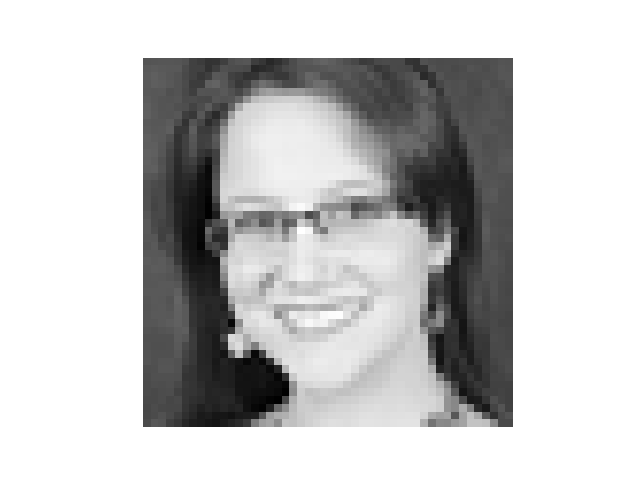

In [12]:
image_path = photos_folder + 'Happiness7.png'

image = Image.open(image_path).convert("RGB")
image

In [13]:
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)

logits = outputs.logits

predicted_class_idx = logits.argmax(-1).item()

class_name= model.config.id2label[predicted_class_idx]

print("Predicted class:", class_name)

Predicted class: oboe, hautboy, hautbois
